<a href="https://colab.research.google.com/github/Yesi0/Hipotesis-exito-streams-spotify-/blob/main/hito3_yesenia_quirozipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error




In [ ]:
pd.read_csv('tablas_unidas.csv')

,track_id,track_name,artist_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,cuartiles_speech,cuartiles_bpm,cat_dance,cat_valance,cat_energy,cat_acoustic,cat_instrumental,cat_live,cat_speech,cat_bpm
0,1593131,Beautiful Girl,Luciano,1,2022-04-22,710,4,160035717,16,11,...,3,3,Alto,Alto,Bajo,Alto,Bajo,Bajo,Alto,Alto
1,6363032,Calm Down,R,1,2022-02-09,4013,10,445763624,107,44,...,2,2,Alto,Alto,Alto,Alto,Bajo,Bajo,Bajo,Bajo
2,4342968,Crazy What Love Can Do,"David Guetta, Ella Henderson, Becky Hill",3,2022-03-18,5290,0,286739476,139,73,...,1,3,Bajo,Bajo,Alto,Bajo,Bajo,Alto,Bajo,Alto
3,2761463,Down Under (feat. Colin Hay),"Luude, Colin Hay",2,2021-11-19,3541,2,252871192,57,13,...,4,4,Bajo,Bajo,Alto,Bajo,Alto,Alto,Alto,Alto
4,6250958,Have You Ever Seen The Rain,Creedence Clearwater Revival,1,1968-07-01,15890,14,1145727611,71,37,...,1,2,Alto,Alto,Alto,Bajo,Bajo,Alto,Bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,8725160,Love Nwantiti - Remix,"Ckay, AX'EL, Dj Yo!",3,2019-08-30,2696,0,540539717,42,2,...,2,2,Bajo,Bajo,Bajo,Alto,Alto,Bajo,Bajo,Bajo
944,7587856,Say You Won't Let Go,James Arthur,1,2016-09-09,15722,16,2420461338,231,37,...,2,1,Bajo,Bajo,Bajo,Alto,Bajo,Bajo,Bajo,Bajo
945,4611820,Special,SZA,1,2022-12-09,906,0,88092256,6,21,...,2,1,Bajo,Bajo,Bajo,Alto,Bajo,Bajo,Bajo,Bajo
946,3557036,The Business,Ti,1,2020-01-01,14311,0,1062345656,255,32,...,4,2,Alto,Bajo,Bajo,Alto,Alto,Bajo,Alto,Bajo


In [ ]:
datos = pd.read_csv('tablas_unidas.csv')
datos.head()

,track_id,track_name,artist_name,artist_count,release_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,cuartiles_speech,cuartiles_bpm,cat_dance,cat_valance,cat_energy,cat_acoustic,cat_instrumental,cat_live,cat_speech,cat_bpm
0,1593131,Beautiful Girl,Luciano,1,2022-04-22,710,4,160035717,16,11,...,3,3,Alto,Alto,Bajo,Alto,Bajo,Bajo,Alto,Alto
1,6363032,Calm Down,R,1,2022-02-09,4013,10,445763624,107,44,...,2,2,Alto,Alto,Alto,Alto,Bajo,Bajo,Bajo,Bajo
2,4342968,Crazy What Love Can Do,"David Guetta, Ella Henderson, Becky Hill",3,2022-03-18,5290,0,286739476,139,73,...,1,3,Bajo,Bajo,Alto,Bajo,Bajo,Alto,Bajo,Alto
3,2761463,Down Under (feat. Colin Hay),"Luude, Colin Hay",2,2021-11-19,3541,2,252871192,57,13,...,4,4,Bajo,Bajo,Alto,Bajo,Alto,Alto,Alto,Alto
4,6250958,Have You Ever Seen The Rain,Creedence Clearwater Revival,1,1968-07-01,15890,14,1145727611,71,37,...,1,2,Alto,Alto,Alto,Bajo,Bajo,Alto,Bajo,Bajo


In [ ]:
# Separar los datos en variables independientes (X) y dependiente (y) para la regresión con total_playlist_participation
X_playlist = datos[['total_playlist_participation']]
y_streams = datos['streams']

# Dividir los datos en conjuntos de entrenamiento y prueba para el nuevo modelo
X_playlist_train, X_playlist_test, y_streams_train, y_streams_test = train_test_split(
    X_playlist, y_streams, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal para total_playlist_participation
model_playlist = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model_playlist.fit(X_playlist_train, y_streams_train)

# Realizar predicciones en el conjunto de prueba
y_playlist_pred = model_playlist.predict(X_playlist_test)

# Calcular y mostrar las métricas de evaluación del modelo para total_playlist_participation
r2_playlist = r2_score(y_streams_test, y_playlist_pred)
mse_playlist = mean_squared_error(y_streams_test, y_playlist_pred)

# Coeficientes del modelo para total_playlist_participation
intercept_playlist = model_playlist.intercept_
slope_playlist = model_playlist.coef_[0]

(intercept_playlist, slope_playlist, r2_playlist, mse_playlist)


(235564636.31485873,
 49243.081486934985,
 0.6207123915450762,
 1.2922394602496082e+17)

**Intercepto (235,564,636.31)**: Este número representa el valor estimado de 'streams' cuando la 'total_playlist_participation' es cero. En el contexto de los datos, sugiere que una canción que no esté presente en ninguna lista de reproducción podría esperar, según el modelo, tener alrededor de 235 millones de 'streams'. Esto puede no ser realista y podría indicar que hay otras variables que también son importantes para predecir 'streams' que no se están considerando en el modelo.

**Pendiente (49,243.08):** La pendiente del modelo indica el cambio esperado en 'streams' por cada unidad adicional de 'total_playlist_participation'. En este caso, por cada incremento de una unidad en la participación de listas de reproducción, el modelo predice un aumento promedio de aproximadamente 49,243 'streams'. Esto sugiere una relación positiva: a medida que una canción aparece en más listas de reproducción, tiende a acumular más 'streams'.

**Coeficiente de determinación R2  (0.6207):** El valor de R2   es una medida estadística que indica la proporción de la variabilidad en la variable dependiente ('streams') que puede ser explicada por la variable independiente ('total_playlist_participation') en el modelo de regresión. Un R2   de 0.6207 significa que aproximadamente el 62.07% de la variabilidad en 'streams' puede ser explicada por la participación en listas de reproducción. Este es un ajuste relativamente bueno para un modelo de regresión lineal, pero todavía hay un 37.93% de la variabilidad que no se explica por este modelo.

**Error cuadrático medio (MSE) (1.2922394602496082e+17)**: El MSE es una medida de la calidad del modelo que calcula el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada entre los valores observados y los valores predichos por el modelo. En este caso, el MSE es bastante alto, lo que indica que hay un error significativo en las predicciones del modelo. El valor alto del MSE podría deberse a la presencia de outliers (valores atípicos) o a que el modelo no captura todas las variabilidades de los datos.

En resumen, el modelo sugiere una relación positiva y significativa entre la participación en listas de reproducción y los 'streams' de una canción, aunque no captura toda la variabilidad y presenta un error considerable en las predicciones. Esto podría ser una indicación de que otros factores adicionales afectan los 'streams' o que la relación no es estrictamente lineal.

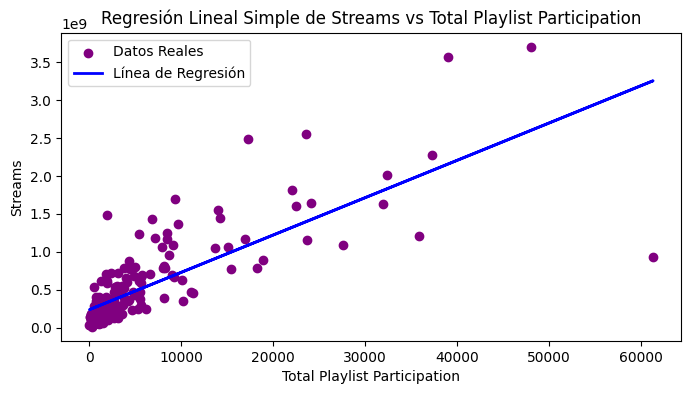

In [ ]:
# Crear un gráfico de dispersión de los datos
plt.figure(figsize=(8, 4))
plt.scatter(X_playlist_test, y_streams_test, color='purple', label='Datos Reales')

# Añadir la línea de regresión al gráfico
plt.plot(X_playlist_test, y_playlist_pred, color='blue', linewidth=2, label='Línea de Regresión')

# Añadir etiquetas y título al gráfico
plt.title('Regresión Lineal Simple de Streams vs Total Playlist Participation')
plt.xlabel('Total Playlist Participation')
plt.ylabel('Streams')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:

X_bpm = datos[['bpm']]
y_streams = datos['streams']


X_bpm_train, X_bpm_test, y_streams_train, y_streams_test = train_test_split(
    X_bpm, y_streams, test_size=0.2, random_state=42)

model_bpm = LinearRegression()


model_bpm.fit(X_bpm_train, y_streams_train)


y_bpm_pred = model_bpm.predict(X_bpm_test)


r2_bpm = r2_score(y_streams_test, y_bpm_pred)
mse_bpm = mean_squared_error(y_streams_test, y_bpm_pred)


intercept_bpm = model_bpm.intercept_
slope_bpm = model_bpm.coef_[0]

(intercept_bpm, slope_bpm, r2_bpm, mse_bpm)

(532588371.59627235,
 -132776.87801781486,
 -0.000611114534452506,
 3.409099421499896e+17)

intercept_bpm: 532588371.59627235 - Este es el intercepto 'b' de la línea de regresión. Significa que cuando el BPM es 0, el modelo predice que la cantidad de streams sería aproximadamente 532 millones. Este número es conceptualmente inverosímil ya que no tendríamos 'streams' sin canciones, lo que indica que tal vez los BPM no sean una buena característica para predecir 'streams' o que el modelo no se ajusta bien a los datos.

slope_bpm: -132776.87801781486 - La pendiente 'm' de la línea es negativa, lo que sugiere que hay una relación inversa entre BPM y 'streams' según el modelo: a medida que aumenta el BPM, el número de 'streams' disminuye. Esta pendiente indica cómo cambia el número de 'streams' con cada unidad de cambio en BPM.

r2_bpm: -0.000611114534452506 - El coeficiente R² es negativo, lo cual es inusual ya que R² debería estar entre 0 y 1 en un modelo de regresión válido. Un R² negativo indica que el modelo es peor que simplemente tomar la media de los 'streams' como predicción para todos los datos. Esto significa que BPM no es un buen predictor de 'streams' en este contexto.

mse_bpm: 3.409099421499896e+17 - El error cuadrático medio (MSE) es muy alto, lo que sugiere que las predicciones del modelo difieren significativamente de los valores reales de 'streams'. Un MSE grande es indicativo de un modelo de baja precisión.

En resumen, con un intercepto muy alto, una pendiente negativa, un R² negativo y un MSE muy alto, el modelo de regresión lineal no parece ser adecuado para predecir la cantidad de 'streams' basándose en el BPM de las canciones. Esto podría significar que no hay una relación lineal entre estas dos variables o que hay otros factores que influyen en los 'streams' que no se han considerado en este modelo.

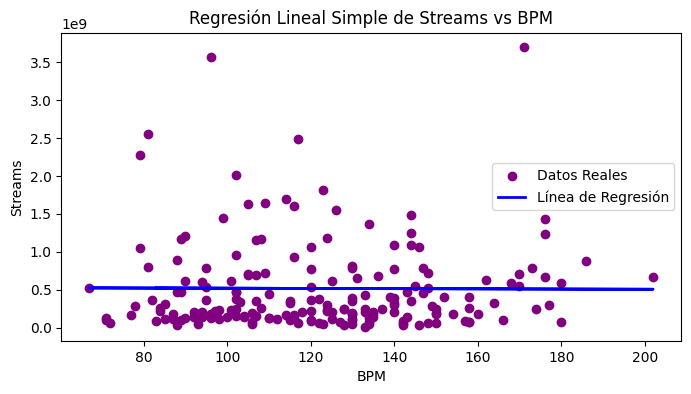

In [ ]:
# Crear un gráfico de dispersión de los datos
plt.figure(figsize=(8, 4))
plt.scatter(X_bpm_test, y_streams_test, color='purple', label='Datos Reales')

# Añadir la línea de regresión al gráfico
plt.plot(X_bpm_test, y_bpm_pred, color='blue', linewidth=2, label='Línea de Regresión')

# Añadir etiquetas y título al gráfico
plt.title('Regresión Lineal Simple de Streams vs BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.legend()

# Mostrar el gráfico
plt.show()